In [2]:
import numpy as np
import tqdm
import os


train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/Face2Emoji/data/fer2013.csv'

with open(csv_path) as f:
    for line in tqdm.tqdm(f.read().splitlines()[1:]):
        emotion, pixels, usage = line.split(',')
        x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
        y = int(emotion)

        if usage == 'PrivateTest':
            eval_x.append(x)
            eval_y.append(y)
        else:
            train_x.append(x)
            train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:23<00:00, 1535.65it/s]

train : 32298, eval :3589


Illegal line #217
	"       - 'Nanum'
"
	in file "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc"


Angry


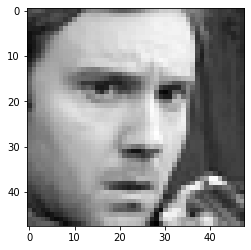

In [3]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [5]:
import tensorflow as tf


# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
history = model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=128,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

Epoch 1/100
253/253 [==============================] - 53s 209ms/step - loss: 1.7913 - categorical_accuracy: 0.2691 - val_loss: 1.9168 - val_categorical_accuracy: 0.2449
Epoch 2/100
253/253 [==============================] - 7s 27ms/step - loss: 1.6065 - categorical_accuracy: 0.3716 - val_loss: 1.9133 - val_categorical_accuracy: 0.1655
Epoch 3/100
253/253 [==============================] - 7s 27ms/step - loss: 1.4868 - categorical_accuracy: 0.4274 - val_loss: 1.9273 - val_categorical_accuracy: 0.1655
Epoch 4/100
253/253 [==============================] - 7s 27ms/step - loss: 1.3971 - categorical_accuracy: 0.4667 - val_loss: 1.9284 - val_categorical_accuracy: 0.1655
Epoch 5/100
253/253 [==============================] - 7s 28ms/step - loss: 1.3214 - categorical_accuracy: 0.4950 - val_loss: 1.9091 - val_categorical_accuracy: 0.1655
Epoch 6/100
253/253 [==============================] - 7s 27ms/step - loss: 1.2541 - categorical_accuracy: 0.5238 - val_loss: 1.8960 - val_categorical_accurac

253/253 [==============================] - 7s 28ms/step - loss: 0.0838 - categorical_accuracy: 0.9711 - val_loss: 3.5992 - val_categorical_accuracy: 0.4974
Epoch 98/100
253/253 [==============================] - 7s 28ms/step - loss: 0.0837 - categorical_accuracy: 0.9708 - val_loss: 3.5583 - val_categorical_accuracy: 0.5071
Epoch 99/100
253/253 [==============================] - 8s 30ms/step - loss: 0.0791 - categorical_accuracy: 0.9729 - val_loss: 3.7482 - val_categorical_accuracy: 0.5088
Epoch 100/100
253/253 [==============================] - 7s 30ms/step - loss: 0.0789 - categorical_accuracy: 0.9732 - val_loss: 3.1752 - val_categorical_accuracy: 0.5174


In [6]:
history_dict = history.history
print(history_dict.keys()) 

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


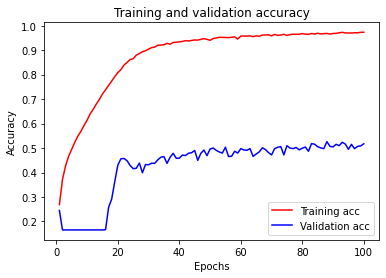

In [7]:
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
model_path = os.getenv('HOME')+'/exe/0915/model.h5'
model.save(model_path)

## 총평


- https://J-43.github.io/Face2Emoji

- tensorflowjs 설치 후, 커널이 죽기 시작했다. 새로 tensorflow를 설치하고, 커널이 죽지않았지만 이번엔 수정한 model.json을 컴퓨터가 읽지 못하고 에러를 내뿜는다. 주말동안 삭제와 재설치를 반복했지만 다른분의 model.json파일을 받아도 같은 에러가 떠서 aiffel가상환경 자체가 문제가 된 것 같다. model.h5 를 model.json으로 변환했다고 파일은 생기지만 이 파일을 읽지를 못한다. 알 수 없다.. 왜 .. 
- 그래서 아직 노드를 진행안하신 분(tensorflowjs 설치전)에게 부탁을 해서 내가 한 모델파일을 보내고.. 그 분이 변환해서 내 깃페이지에 올리니 실행이 된다. 왜.. 같은 파일인데.. 읽지를 못하니..   


- 코드로 돌아와서 
    - 본인의 github 페이지에 Face2Emoji 웹앱 url이 게시되어 서비스가 가능하다.   >> 가능
    - 얼굴 감정인식 정확도를 47% 이상 달성하였다.  >> 달성
    - 현재 버전의 이미지 처리 방식(얼굴영역이 아닌 전체 처리), 모델 훈련 방식 등의 문제점을 정확하게 지적하고, 그 개선 방안을 3가지 이상 정확히 정리하거나, 1가지 이상을 실제 적용하였다.  >> 얼굴 영역만 자르는 방법을 지난번 노드에서 배워서 적용해볼까 했지만, tensorflowjs 문제 해결하느라 시간을 너무 허비했기에.. 다음기회에..